## Analyse Benchmark Testbed

In [147]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import pickle

DATA_NAME = 'university_k_4_L_2_n_4_chancap500_numchans1_mldat2e6_bidirectional'
# DATA_NAME = 'ndf50_mldat6e6_load0.4_university'
path_to_benchmark_data = '/scratch/datasets/trafpy/management/flowcentric/{}_testbed_data_v34.obj'.format(DATA_NAME)
filehandler = open(path_to_benchmark_data, 'rb')
tb_dict = pickle.load(filehandler)

print(tb_dict.keys())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['benchmark_data', 'benchmarks', 'envs', 'config'])


In [148]:
%autoreload
# unpack env dicts into list of env objects
envs = tb_dict['envs']

In [149]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

# analyse
analysers = [EnvAnalyser(env, time_units='\u03BCs', info_units='B', subject_class_name=env.scheduler.scheduler_name) for env in envs]
for analyser in analysers:
    analyser.compute_metrics(measurement_start_time='auto',
                             measurement_end_time='auto',
                             print_summary=True)



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.5_repeat_0_scheduler_SRPT'
Measurement duration: 1862629.0686000267 (Start time : 206958.78540000296 μs | End time: 2069587.8540000296 μs)
Total number of generated demands (jobs or flows) passed to env: 166295
Total number of these demands which arrived during measurement period: 149515
Total info arrived: 3730298889.0 B
Total info transported: 3449298909.0 B
Load (abs): 2002.7062563797178 B/μs
Load (frac): 0.5006765640949294 fraction of network capacity requested.
Throughput (abs): 1851.8442384196937 B/μs
Throughput (frac): 0.9246709209204067 fraction of arrived info successfully transported.
T-Score: 48.89586355100452

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 166295
Total number of these flows which arrived during measurement period: 149515
Time first flow arrived: 206969.1401353307 μs
Time last 



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.2_repeat_0_scheduler_FS'
Measurement duration: 3983091.4372501597 (Start time : 442565.7152500178 μs | End time: 4425657.152500178 μs)
Total number of generated demands (jobs or flows) passed to env: 151178
Total number of these demands which arrived during measurement period: 135869
Total info arrived: 3214625085.0 B
Total info transported: 3214679772.0 B
Load (abs): 807.067860641258 B/μs
Load (frac): 0.2017669651603145 fraction of network capacity requested.
Throughput (abs): 807.0815904290024 B/μs
Throughput (frac): 1.000017011937179 fraction of arrived info successfully transported.
T-Score: 48.34124370378479

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 151178
Total number of these flows which arrived during measurement period: 135869
Time first flow arrived: 442689.3172533224 μs
Time last flow arr



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.5_repeat_0_scheduler_Rand'
Measurement duration: 1862629.0686000267 (Start time : 206958.78540000296 μs | End time: 2069587.8540000296 μs)
Total number of generated demands (jobs or flows) passed to env: 166295
Total number of these demands which arrived during measurement period: 149515
Total info arrived: 3730298889.0 B
Total info transported: 3394533688.0 B
Load (abs): 2002.7062563797178 B/μs
Load (frac): 0.5006765640949294 fraction of network capacity requested.
Throughput (abs): 1822.4421304405876 B/μs
Throughput (frac): 0.9099897324608189 fraction of arrived info successfully transported.
T-Score: 40.905320414118975

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 166295
Total number of these flows which arrived during measurement period: 149515
Time first flow arrived: 206969.1401353307 μs
Time last



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.1_repeat_0_scheduler_Rand'
Measurement duration: 8836279.04249998 (Start time : 981808.7824999978 μs | End time: 9818087.824999977 μs)
Total number of generated demands (jobs or flows) passed to env: 166295
Total number of these demands which arrived during measurement period: 149483
Total info arrived: 3551264726.0 B
Total info transported: 3551498278.0 B
Load (abs): 401.89594612386395 B/μs
Load (frac): 0.10047398653096598 fraction of network capacity requested.
Throughput (abs): 401.9223771587913 B/μs
Throughput (frac): 1.0000657658659717 fraction of arrived info successfully transported.
T-Score: 48.81488365795435

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 166295
Total number of these flows which arrived during measurement period: 149483
Time first flow arrived: 981879.9557426786 μs
Time last flow

In [150]:
# TEMPORARY CELL FOR RENAMING ANY PREVIOUSLY SAVED SCHEDULER NAMES WITH NEW SHORTENED CONVENTION
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name == 'fair_share':
        analyser.env.scheduler.scheduler_name = 'FS'
    elif analyser.env.scheduler.scheduler_name == 'first_fit':
        analyser.env.scheduler.scheduler_name = 'FF'
    elif analyser.env.scheduler.scheduler_name == 'random':
        analyser.env.scheduler.scheduler_name = 'Rand'
    elif analyser.env.scheduler.scheduler_name == 'srpt_v2':
        analyser.env.scheduler.scheduler_name = 'SRPT'
    elif analyser.env.scheduler.scheduler_name[0:6] == 'lambda':
        analyser.env.scheduler.scheduler_name = '\u03BB' + str(analyser.env.scheduler._lambda) + 'S'
    analyser.subject_class_name = analyser.env.scheduler.scheduler_name

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput Rate (B/μs),Frac Flows Dropped,Frac Info Dropped
0,0.1,SRPT,48.839741,122.8,1705.9,111974.9,401.9,0.000013,0.00001
1,0.1,FS,48.824336,134.9,1932.7,127051.6,401.9,0.000013,0.00001
2,0.1,Rand,48.814884,139.5,1963.9,135751.6,401.9,0.000013,0.00001
3,0.1,FF,48.769980,185.6,3122.2,118801.6,401.9,0.000013,0.00001
4,0.2,SRPT,48.350308,140.2,1945.1,262113.6,806.8,0.000037,0.00164
5,0.2,FS,48.341244,169.7,2447.7,212863.6,807.1,0.000037,0.00164
6,0.2,FF,48.150961,340.9,5810.9,207863.6,807.1,0.000044,0.00164
7,0.2,Rand,48.051145,184.9,2583.5,241688.0,803.4,0.000059,0.00624
8,0.3,SRPT,49.034153,161.9,2103.8,299052.1,1184.0,0.000047,0.01490
9,0.3,FS,48.567858,209.7,3038.7,222502.1,1185.9,0.000087,0.01380


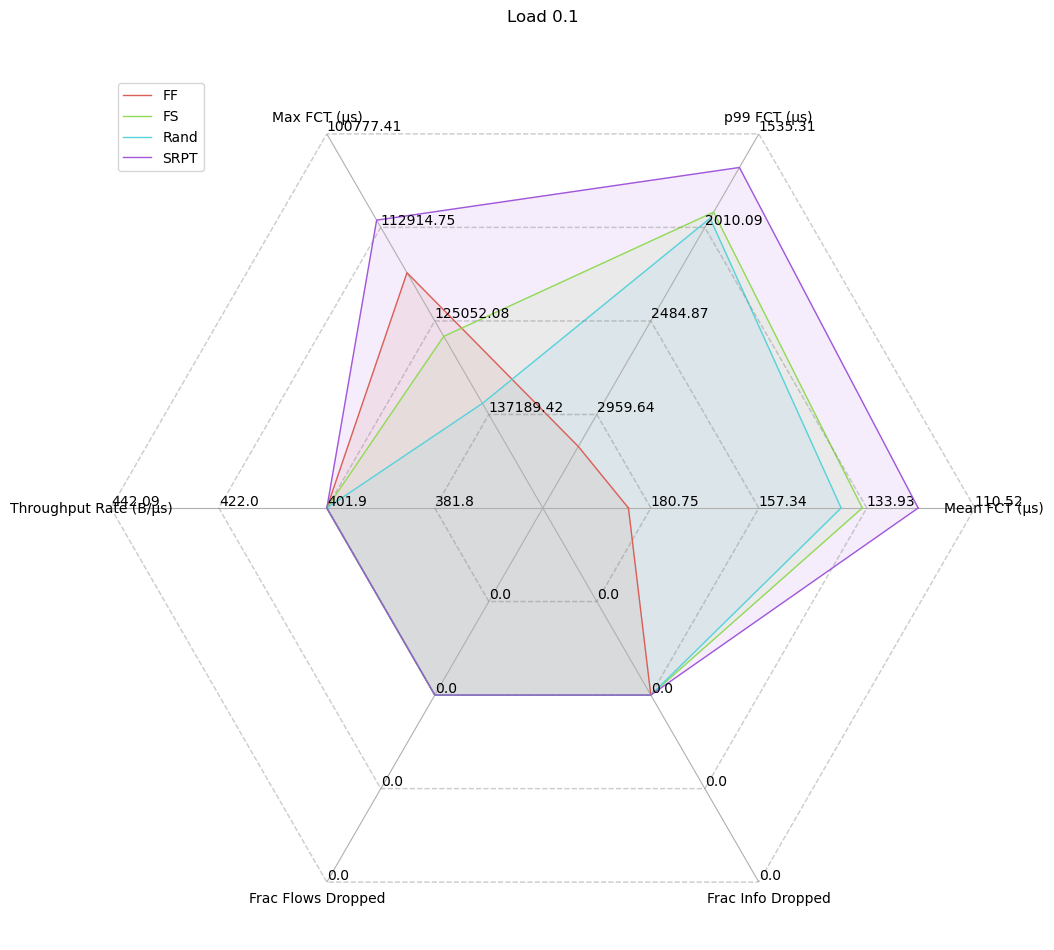

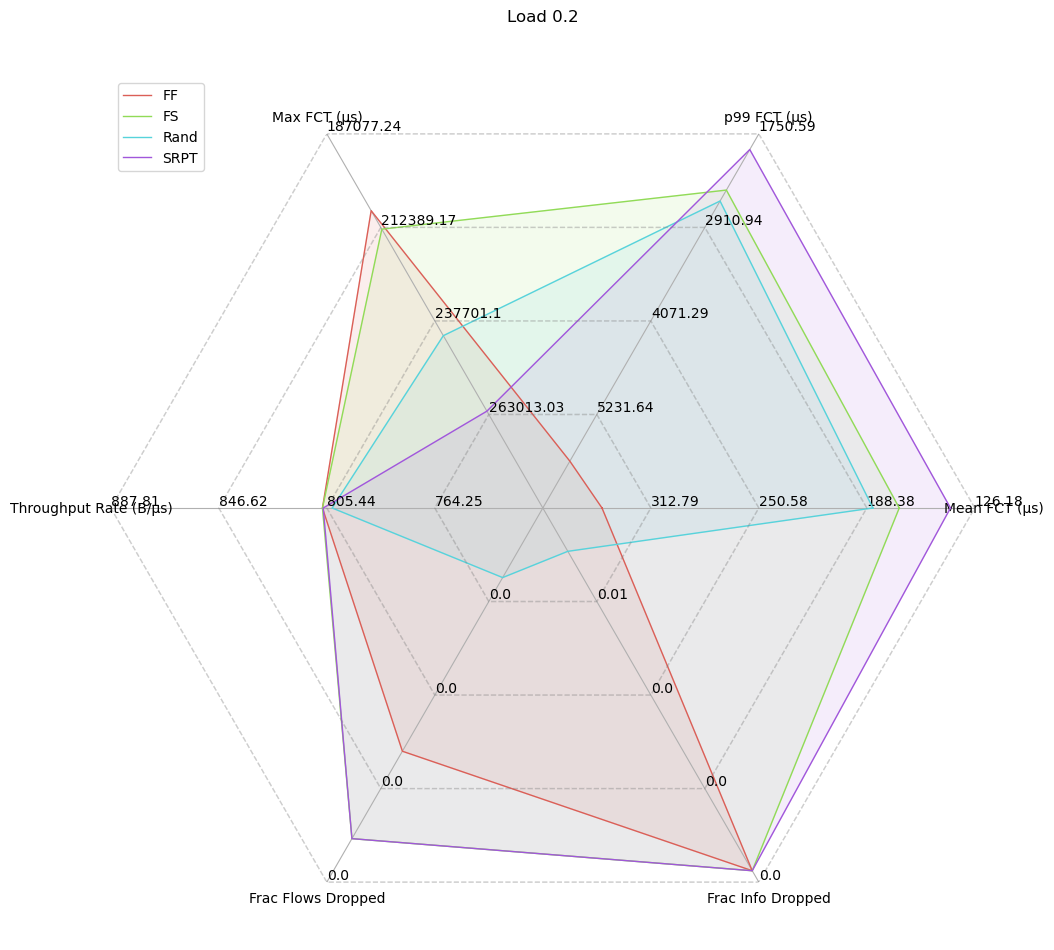

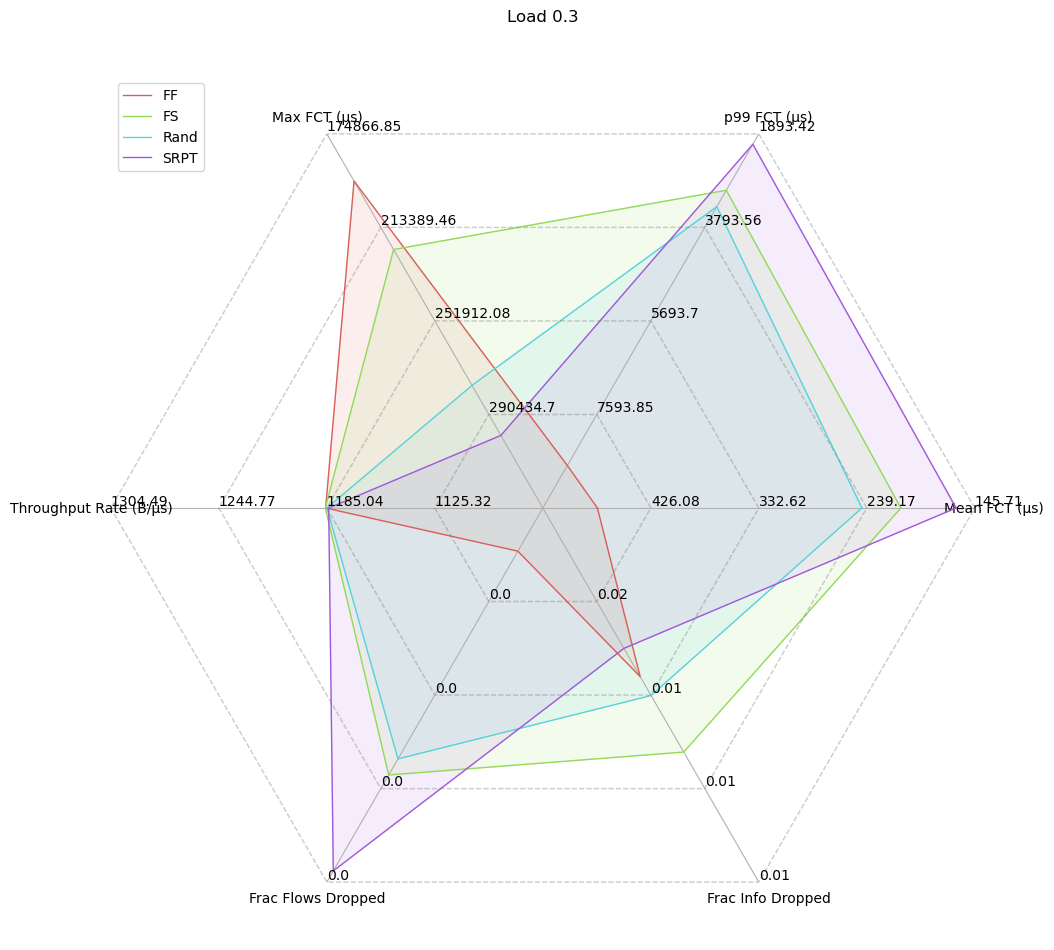

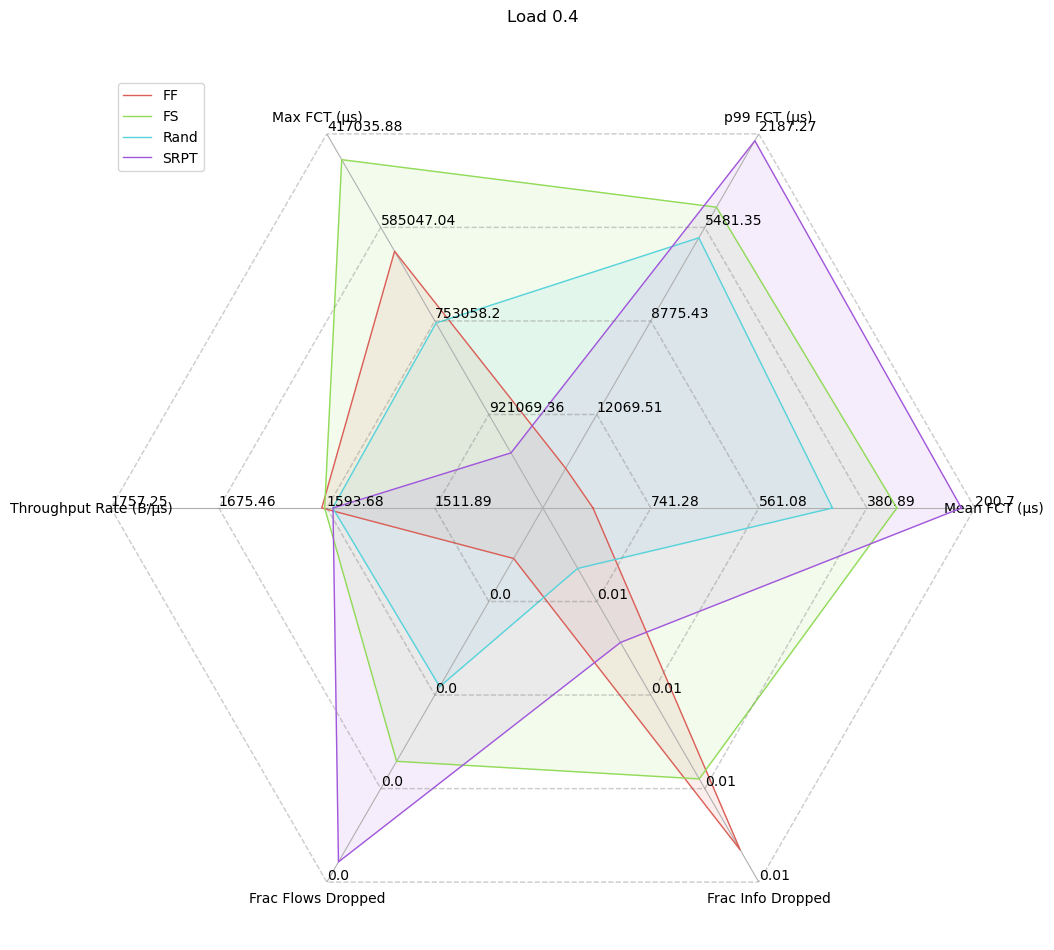

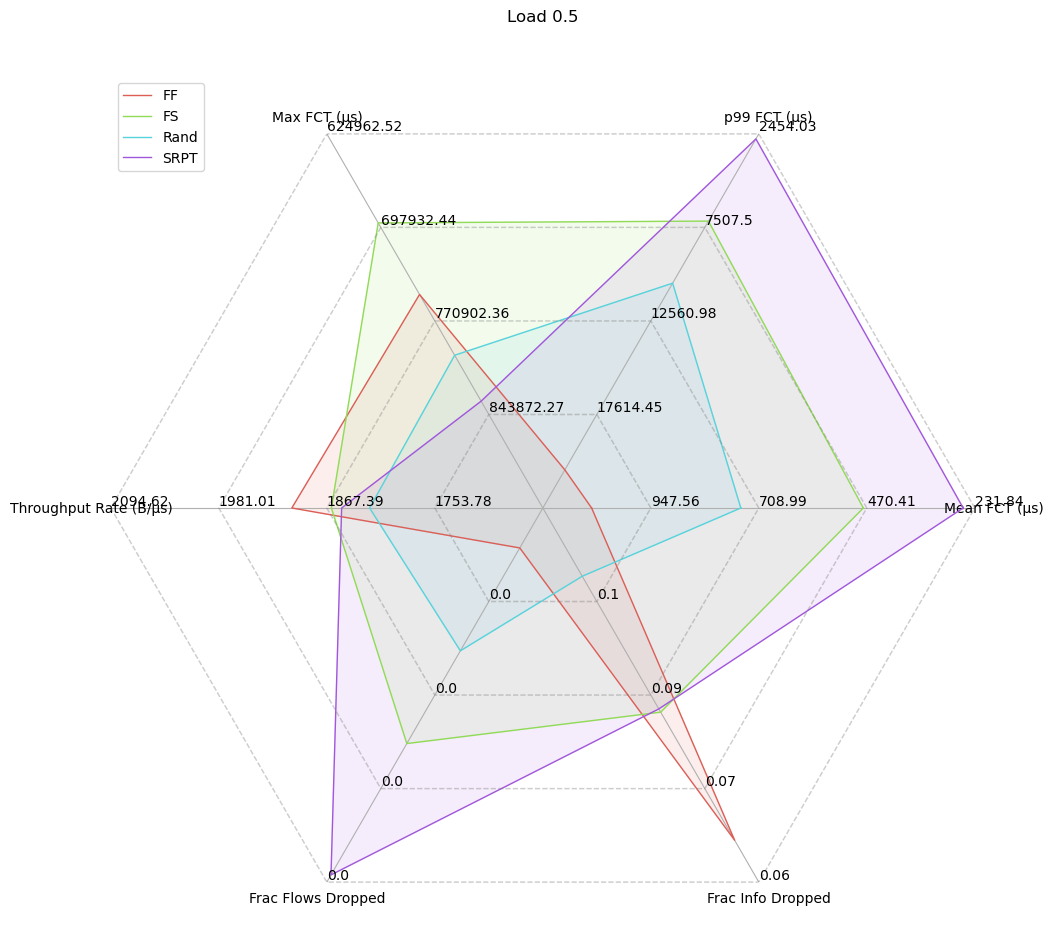

In [151]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter
    
# plot
plotter = EnvsPlotter(time_units='\u03BCs', info_units='B')
_ = plotter.display_t_score_table(*analysers, display_table=True)
# _ = plotter.plot_t_score_scatter(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)

# COMMENT IF HAVEN'T TRACKED QUEUE EVOLUTION AND SCHEDULER DECISION COLOUR GRID
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_num_flows', *analysers)
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_info_units', *analysers)
# _ = plotter.plot_demand_slot_colour_grid_for_different_schedulers(*analysers)

# COMMENT IF WANT TO SAVE TIME
# _ = plotter.plot_link_utilisation_vs_time_for_different_loads(*analysers, mean_period=2500, figsize=(6, 2), legend_ncol=2, plot_legend=False)
# _ = plotter.plot_link_concurrent_demands_vs_time_for_different_loads(*analysers, mean_period=500)




# _ = plotter.plot_demand_completion_time_vs_size_for_different_loads(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)
# _ = plotter.plot_throughput_vs_load(*analysers, plot_bar_charts=False, gridlines=True, figsize=(6, 2), legend_ncol=2)
# _ = plotter.plot_fcts_cdf_for_different_loads(*analysers, gridlines=True, figsize=(6, 2), legend_ncol=2)
# _ = plotter.plot_mean_fct_vs_load(*analysers, gridlines=True, figsize=(6, 2), legend_ncol=2)
# _ = plotter.plot_99th_percentile_fct_vs_load(*analysers, gridlines=True, figsize=(6, 2), legend_ncol=2)
# _ = plotter.plot_max_fct_vs_load(*analysers, gridlines=True, figsize=(6, 2), legend_ncol=2)
# _ = plotter.plot_fraction_of_arrived_flows_dropped_vs_load(*analysers, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
# _ = plotter.plot_fraction_of_arrived_info_dropped_vs_load(*analysers, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


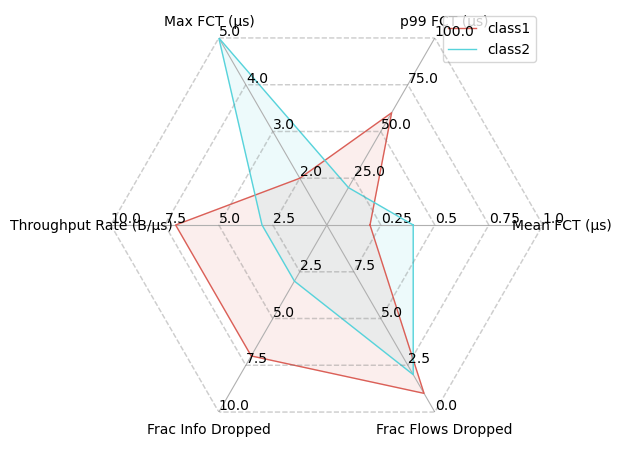

In [153]:
# CUSTOM RADAR PLOT(S)
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

time_units = '\u03BCs'
info_units = 'B'

plot_dict = {'Mean FCT ({})'.format(time_units): {'range': [0, 1], 'classes': {'class1': 0.2,
                                                         'class2': 0.4}},
             'p99 FCT ({})'.format(time_units): {'range': [0, 100], 'classes': {'class1': 60,
                                                           'class2': 20}},
             'Max FCT ({})'.format(time_units): {'range': [1, 5], 'classes': {'class1': 2,
                                                         'class2': 5}},
             'Throughput Rate ({}/{})'.format(info_units, time_units): {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Info Dropped': {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Flows Dropped': {'range': [10, 0], 'classes': {'class1': 1,
                                                          'class2': 2}}
            }

_ = tpg.plot_radar(plot_dict)

In [ ]:
# PLOT SCHEDULER SENSITIVITY TO LOAD
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

from collections import defaultdict


time_units = '\u03BCs'
info_units = 'B'
headers = ['Mean FCT ({})'.format(time_units),
           'p99 FCT ({})'.format(time_units),
           'Max FCT ({})'.format(time_units),
           'Throughput Rate ({}/{})'.format(info_units, time_units),
           'Frac Info Dropped',
           'Frac Flows Dropped']


scheduler_to_analysers = {}
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name not in scheduler_to_analysers:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name] = [analyser]
    else:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name].append(analyser)

for scheduler_name in scheduler_to_analysers.keys():
    nested_dict = lambda: defaultdict(nested_dict)
    plot_dict = nested_dict()
    
    anys = scheduler_to_analysers[scheduler_name]
    summary_dict = tpg.get_summary_dict(anys, headers, time_units=time_units, info_units=info_units)
#     for analyser in anys:
    print(summary_dict)
        
    

In [1]:
# %autoreload
# import trafpy
# import trafpy.generator as tpg
# from trafpy.manager import RandomAgent, RWA, Demand, DCN, EnvAnalyser
# import json

# DATA_BAME = 'artificial_light_chancap10'
# path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/benchmark_data/{}_benchmark_data.json'.format(DATA_NAME)
# benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))
# benchmarks = list(benchmark_data.keys())

# SLOT_SIZE = 1.0
# PACKET_SIZE = 1
# NUM_CHANNELS = 1
# NUM_K_PATHS = 1
# MAX_FLOWS = 10
# MAX_TIME = None

In [ ]:
# network = tpg.gen_fat_tree(k=3, N=2, num_channels=1, server_to_rack_channel_capacity=10)
# rwa = RWA(tpg.gen_channel_names(NUM_CHANNELS), NUM_K_PATHS)
# scheduler = RandomAgent(network, rwa, slot_size=SLOT_SIZE, packet_size=PACKET_SIZE)

# num_benchmark_tests = 0
# for benchmark in benchmarks:
#     for load in benchmark_data[benchmark]:
#         for repeat in benchmark_data[benchmark][load]:
#             num_benchmark_tests += 1

# for benchmark in benchmarks:
#     for load in list(benchmark_data[benchmark].keys()):
#         for repeat in benchmark_data[benchmark][load]:
#             if json.loads(load) == 0.1 and scheduler.scheduler_name == 'random':
#                 demand_data = benchmark_data[benchmark][load][repeat]
#                 demand = tpg.Demand(demand_data)
#                 env = DCN(network, demand, scheduler, num_k_paths=NUM_K_PATHS, slot_size=SLOT_SIZE, max_flows=MAX_FLOWS, max_time=MAX_TIME)
#                 print(env.slot_size)
                
#                 observation = env.reset()
#                 scheduler.register_env(env)
                
#                 while True:
#                     action = scheduler.get_action(observation)
#                     observation, reward, done, info = env.step(action)
                    
#                     if done:
#                         print('Completed')
#                         analyser = EnvAnalyser(env)
#                         analyser.compute_metrics(print_summary=True)

In [ ]:
# packet size = info
# slot size = sec
# min bandwidth in network = info per sec

# assume that 1 packet size of info can be transferred per sub slot
# info per sub slot = 1 packet = packet size
# sub slot size = (info per sub slot / min bandwidth in network) * slot size

In [ ]:
a = None
if a is not None:
    print('not none')
else:
    print('None')

In [ ]:
increment_time = 1.001
print(round(1-(increment_time-1),6))

In [ ]:
ep_link_capacity = 500
